# K-nearest-neighbour-algorithmn with MNIST

## Import Libraries

In [2]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

## Load and Format Data

- load data from keras
- reshape data to 2 Dim
- bring data to [0, 1]

In [3]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x, train_y = train_x.reshape(-1, 28 * 28)[:10000], train_y[:10000]
test_x, test_y = test_x.reshape(-1, 28 * 28)[:1000], test_y[:1000]

train_x = train_x.astype(np.float32) / 255.0
test_x = test_x.astype(np.float32) / 255.0

train_x.shape, test_x.shape

((10000, 784), (1000, 784))

## Define knn-algorithmn

In [4]:
# L2 distance
def euclidean_distance(x, y):
    return np.sqrt(np.sum(np.square(x - y)))

# L2 square distance
def euclidean_distance2(x, y):
    return np.sum(np.square(x - y))


def knn(x, data, label, k=3):

    # calculate distance between input and all data points
    distances = [euclidean_distance(x, x_train) for x_train in data]

    # sort by distance and return indices of the first k neighbors
    distances = np.argpartition(distances, k)[:k]

    # return the most common class label
    classes, frequency = np.unique(label[distances], return_counts=True)

    return classes[np.argmax(frequency)]

## Get Accuracy with test data

In [5]:
right = 0
for i, (x, y) in enumerate(zip(test_x, test_y)):
    if knn(x, train_x, train_y, k=5) == y:
        right += 1
    if i % 100 == 0:
        print(f"Epoch: {i} with Accuracy: {right / (i + 1)}")

print(f"Accuracy: {right / len(test_y)}")

Epoch: 0 with Accuracy: 1.0
Epoch: 100 with Accuracy: 0.9504950495049505
Epoch: 200 with Accuracy: 0.9402985074626866
Epoch: 300 with Accuracy: 0.9269102990033222
Epoch: 400 with Accuracy: 0.9177057356608479
Epoch: 500 with Accuracy: 0.9181636726546906
Epoch: 600 with Accuracy: 0.9168053244592346
Epoch: 700 with Accuracy: 0.9115549215406562
Epoch: 800 with Accuracy: 0.9138576779026217
Epoch: 900 with Accuracy: 0.9189789123196448
Accuracy: 0.916


## Visualize random Test cases

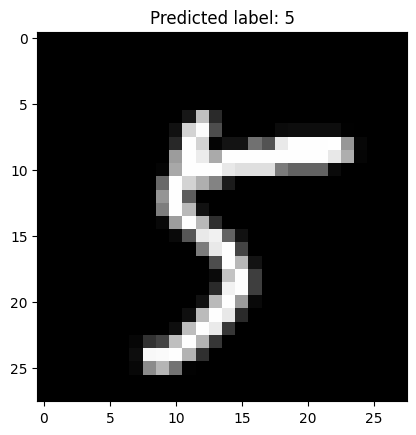

In [10]:
n = np.random.randint(0, len(test_y))
plt.imshow(test_x[n].reshape(28, 28), cmap="gray")
plt.title(f"Predicted label: {knn(test_x[n], train_x, train_y, k=5)}")
plt.show()